<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/Light_curves_using_Lightkurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
!pip install lightkurve
import lightkurve as lk

     |████████████████████████████████| 247 kB 5.4 MB/s 
     |████████████████████████████████| 98 kB 7.5 MB/s 
     |████████████████████████████████| 41 kB 171 kB/s 
     |████████████████████████████████| 4.5 MB 54.1 MB/s 
     |████████████████████████████████| 802 kB 54.7 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.6 MB 41.8 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=5aa91e6dc3fe722f33b7056e907244f6c77251fa21ad01c992b4ca800a3cafe6
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=ba94b3758b032b5f6cbb7d31e63f6f1178591155c7e5b6db88c25ce072547c6c
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for oktopus: filename=oktopus-0.1.2-py3-none-any.whl size=12778 s

In [19]:
the_curve=lk.search_lightcurve("kplr011446443", author="Kepler", cadence="long",quarter=0).download()
the_curve

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.5391194434851,4.0606328e+05,1.6837709e+01,0,9.670235e-04,621.21892,848.89510,568,4.0139259e+05,1.6694973e+01,2.5969946e+03,5.7512480e-01,4.0606328e+05,1.6837709e+01,0,nan,nan,nan,nan,621.21892,3.7738188e-05,848.89510,5.2353815e-05,3.1265066e-04,-2.7012741e-03
120.55955370047741,4.0589859e+05,1.6775635e+01,0,9.676805e-04,621.21903,848.89480,569,4.0127341e+05,1.6692719e+01,2.5945186e+03,5.7482362e-01,4.0589859e+05,1.6775635e+01,0,nan,nan,nan,nan,621.21903,3.7746133e-05,848.89480,5.2364619e-05,5.6086341e-04,-2.9761354e-03
120.57998785741074,4.0594378e+05,1.6850138e+01,0,9.683374e-04,621.21916,848.89509,570,4.0132431e+05,1.6693634e+01,2.5934338e+03,5.7448274e-01,4.0594378e+05,1.6850138e+01,0,nan,nan,nan,nan,621.21916,3.7747533e-05,848.89509,5.2350984e-05,6.7414675e-04,-2.5876898e-03
120.60042221433832,4.0587522e+05,1.6777020e+01,10000000,9.689943e-04,621.21954,848.89527,571,4.0129984e+05,1.6693468e+01,2.5962300e+03,5.7479972e-01,4.0587522e+05,1.6777020e+01,10000000,nan,nan,nan,nan,621.21954,3.7748057e-05,848.89527,5.2364372e-05,1.1631118e-03,-2.6377398e-03
120.62085647121421,4.0591828e+05,1.6818996e+01,0,9.696512e-04,621.21989,848.89547,572,4.0134972e+05,1.6694208e+01,2.5949690e+03,5.7516509e-01,4.0591828e+05,1.6818996e+01,0,nan,nan,nan,nan,621.21989,3.7743641e-05,848.89547,5.2348852e-05,1.4143374e-03,-2.3378779e-03
120.64129062808934,4.0590412e+05,1.6797724e+01,0,9.703081e-04,621.21999,848.89610,573,4.0132694e+05,1.6693768e+01,2.5959238e+03,5.7458931e-01,4.0590412e+05,1.6797724e+01,0,nan,nan,nan,nan,621.21999,3.7746278e-05,848.89610,5.2385014e-05,1.5965897e-03,-1.9867572e-03
120.66172488489974,4.0591725e+05,1.6826801e+01,10000000,9.709649e-04,621.22029,848.89569,574,4.0131862e+05,1.6693893e+01,2.5943230e+03,5.7458967e-01,4.0591725e+05,1.6826801e+01,10000000,nan,nan,nan,nan,621.22029,3.7749101e-05,848.89569,5.2353444e-05,1.7936645e-03,-2.1780455e-03
120.68215924171818,4.0588422e+05,1.6780100e+01,0,9.716217e-04,621.22020,848.89586,575,4.0131303e+05,1.6693476e+01,2.5926799e+03,5.7484448e-01,4.0588422e+05,1.6780100e+01,0,nan,nan,nan,nan,621.22020,3.7744772e-05,848.89586,5.2354055e-05,1.7307586e-03,-2.0547889e-03


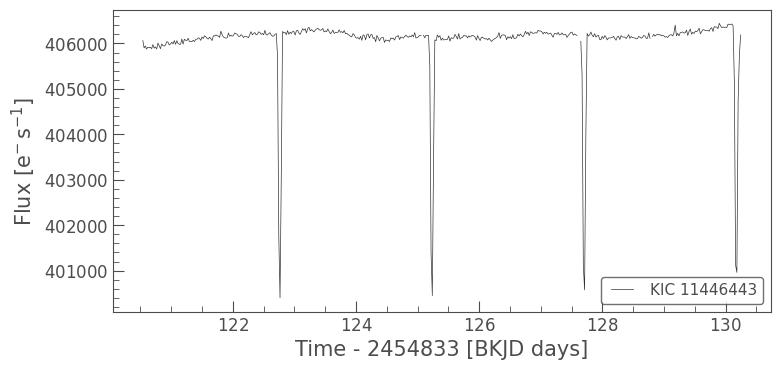

In [20]:
the_curve.plot()